# THE DEFINITIVE DIAMOND BUYING GUIDE

***Data Description***

*Here's the things you need to know before to start exploring the dataset.*


**CARAT:**
Based on Tavernier's law  the price of a diamond increases along with its size. Larger gemstones are rarer and go up rapidly in price. Diamonds of 25 carats and more usually have their own names.

**CUT:**

We often think of a diamond’s cut as shape (round, heart, oval, marquise, pear), but a diamond’s cut grade is really about how well a diamond’s facets interact with light.

**COLOR:**

The diamond color evaluation of most gem-quality diamonds is based on the absence of color. A chemically pure and structurally perfect diamond has no hue, like a drop of pure water, and consequently, a higher value. 
Buying Tip:

For the best value in what would appear to the naked eye as a colorless diamond, look for G-J diamonds. Opt for G-H in diamonds over 1 carat, and I-J for those under 1 carat.  Instead of investing in higher color, invest in higher cut, the most important factor in a diamond's brilliance

**CLARITY:**

While no diamond is perfectly pure, the closer it comes, the higher its value.
Flawless (FL) No inclusions and no blemishes visible under 10x magnification
Internally Flawless (IF) No inclusions visible under 10x magnification
Very, Very Slightly Included (VVS1 and VVS2) Inclusions so slight they are difficult for a skilled grader to see under 10x magnification
Very Slightly Included (VS1 and VS2) Inclusions are observed with effort under 10x magnification, but can be characterized as minor
Slightly Included (SI1 and SI2) Inclusions are noticeable under 10x magnification
Included (I1, I2, and I3) Inclusions are obvious under 10x magnification which may affect transparency and brilliance

**DEPTH (%):**

The depth % of a diamond is calculated by dividing the depth by the width of the diamond. So, if a diamond is 3 mm in depth, and 4.5 mm in width, its depth % is 66.7. The lower the depth %, the larger a diamond of a given carat weight will appear (since most of the diamond's size is in its width vs. in its depth).

**TABLE (%):**

The table % of a diamond is calculated by dividing the width of the table facet by the width of the diamond. So, if the table facet is 3 mm wide, and the diamond is 4.5 mm wide, its table % is 66.7.

**PRICE ($):**

The price is set in US dollars 

**VOlUME (mm):**

The multiplication of the following components
x = lenght in mm
y = width in mm
z = depth in mm


**Needed Libraries:**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the data:**

In [23]:
diamonds = pd.read_csv('/home/juan/IronHack/ih_datamadpt0420_project_m2/Data/diamonds_train.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


**Info about the data**

In [24]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


**Let's check if there is any null value**

In [25]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Let's find the most important statistical measures through the describe method**

In [26]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


**Also, we can describe the object functions**

In [27]:
diamonds.describe(include=['object'])

,cut,color,clarity
count,40455,40455,40455
unique,5,7,8
top,Ideal,G,SI1
freq,16220,8455,9749


**We discovered some zero values for the lenght, width and depth, let see how they are and drop them from the dataframe**

In [28]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1606,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
3945,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
13839,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
14815,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
14891,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
16425,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
19856,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
21602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
24795,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0


In [29]:
len(diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])

16

In [30]:
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]

In [31]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


**Instead of do the analysis of three distinct variables, we will add a new column with *VOLUME* of the diamond --> lenght * width * depth**

In [32]:
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']

In [33]:
#diamonds['$/C'] = diamonds['price']/diamonds['carat']**2

In [34]:
#sns.relplot(y="carat", x="price", kind="line", data=diamonds)

In [35]:
diamonds.drop(['x','y','z'], axis=1, inplace= True)

**Before continue we are going to add two more columns**
- Color group
- Clarity group

*Like we have done with the volume, this will help us to simplify the analysis*

In [36]:
color_dict = {'D':'Colorless','E':'Colorless','F':'Colorless',
              'G':'Near Colorless','H':'Near Colorless','I':'Near Colorless','J':'Near Colorless', 
             'K':'Faint', 'L':'Faint', 'M':'Faint', 
             'N':'Very Light', 'O':'Very Light', 'P':'Very Light', 'Q':'Very Light', 'R':'Very Light',
              'S':'Light', 'T':'Light', 'U':'Light', 'V':'Light', 'W':'Light', 'X':'Light', 'Y':'Light', 'Z':'Light'}

clarity_dict = {'FL':'Perfect',
                'IF':'Excelent',
                'VVS1':'Very Good','VVS2':'Very Good',
                'VS1':'Good', 'VS2':'Good',
                'SI1':'Fair', 'SI2':'Fair',
                'I1':'Poor', 'I2':'Poor','I3':'Poor'}

In [37]:
diamonds['color_grp'] = diamonds['color'].map(color_dict)
diamonds['clarity_grp'] = diamonds['clarity'].map(clarity_dict)

In [38]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume,color_grp,clarity_grp
0,1.21,Premium,J,VS2,62.4,58.0,4268,197.096725,Near Colorless,Good
1,0.32,Very Good,H,VS2,63.0,57.0,505,52.395750,Near Colorless,Good
2,0.71,Fair,G,VS1,65.5,55.0,2686,113.436890,Near Colorless,Good
3,0.41,Good,D,SI1,63.8,56.0,738,66.268800,Colorless,Fair
4,1.02,Ideal,G,SI1,60.5,59.0,4882,168.429975,Near Colorless,Fair


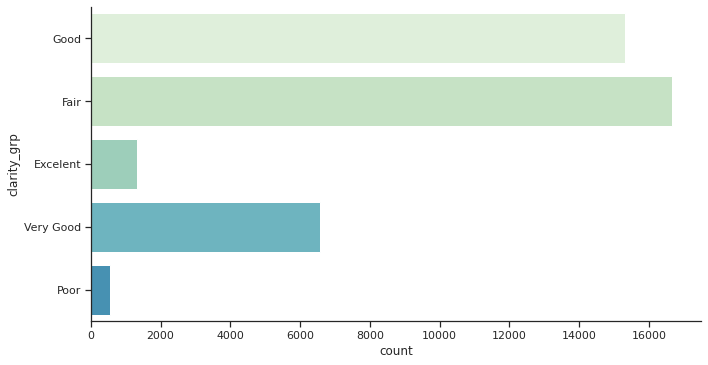

In [39]:
sns.set(style="ticks", palette='GnBu')
#info about the pallete https://loading.io/color/feature/GnBu-8/

sns.catplot(y='clarity_grp', data=diamonds, kind='count' ,aspect=2);

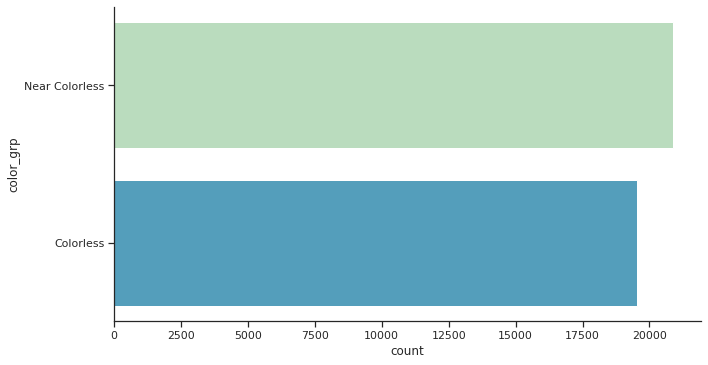

In [40]:
sns.catplot(y='color_grp', data=diamonds, kind='count',aspect=2, palette='GnBu');

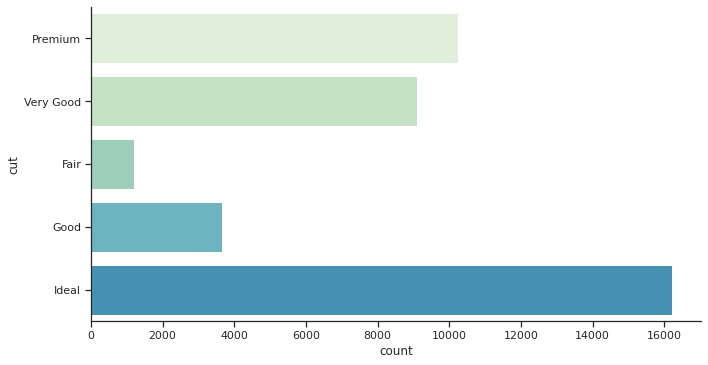

In [41]:
sns.catplot(y='cut', data=diamonds, kind='count' ,aspect=2);

**Let's do trh Correlation Matrix to gather more info about diamonds and its price**

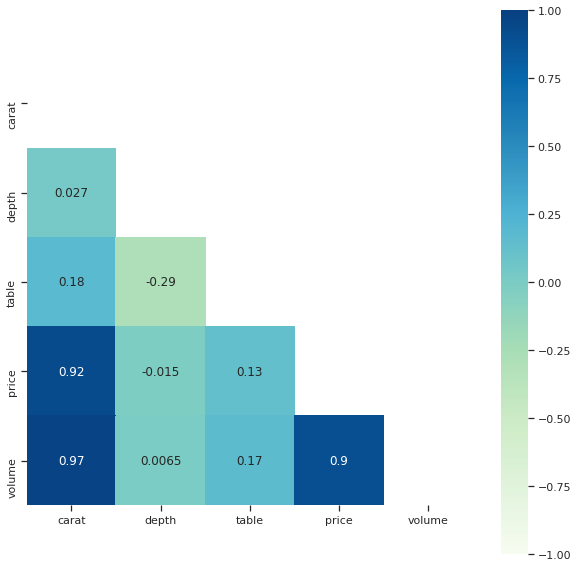

In [42]:
fig, ax = plt.subplots(figsize=(10,10))

matrix = np.triu(diamonds.corr())
sns.heatmap(diamonds.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'GnBu',square=True,  ax=ax);

**Two important conclusions here:**
- As the carat increases, the price increases
- Strong correlation between carat and volume due to as mentioned above the carat is a unit of 'size'

*By the way, be carefull about correlations:* https://www.tylervigen.com/spurious-correlations ;)

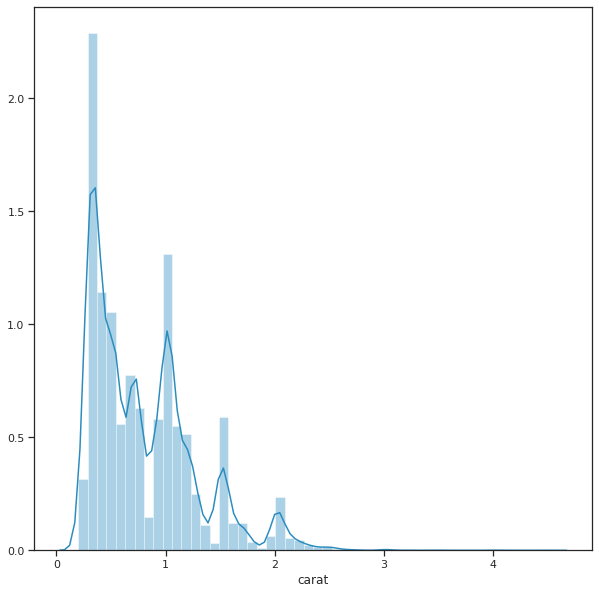

In [43]:
fig, ax = plt.subplots(figsize=(10,10))

sns.distplot(diamonds['carat'], color='#2b8cbe');

**Above the histogram of carat that show us that as larger the diamond is, the more increasingly rare it is, that's why its price increases**

Let's see in a closer way the relation between price and carat

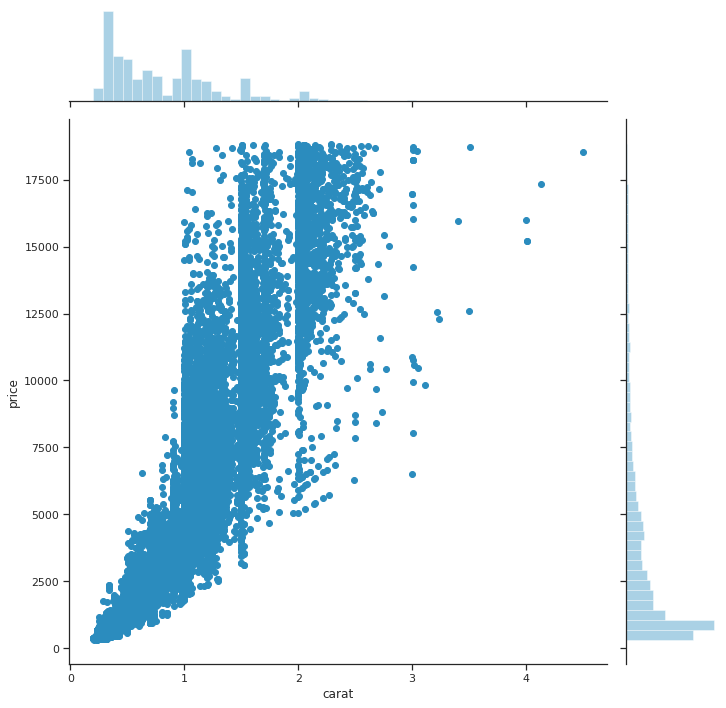

In [44]:
sns.jointplot(x='carat', y='price' , data=diamonds, height=10,color='#2b8cbe');

It's interesting to observe how the diamonds could be classified in carat bins, let's do it!

In [57]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

diamonds['carat_bnd'] = pd.cut(diamonds['carat'], bins)

Once the carat has been divied in bins, let see by boxploting different aspects of diamonds: carat bins, clarity, color and cut:

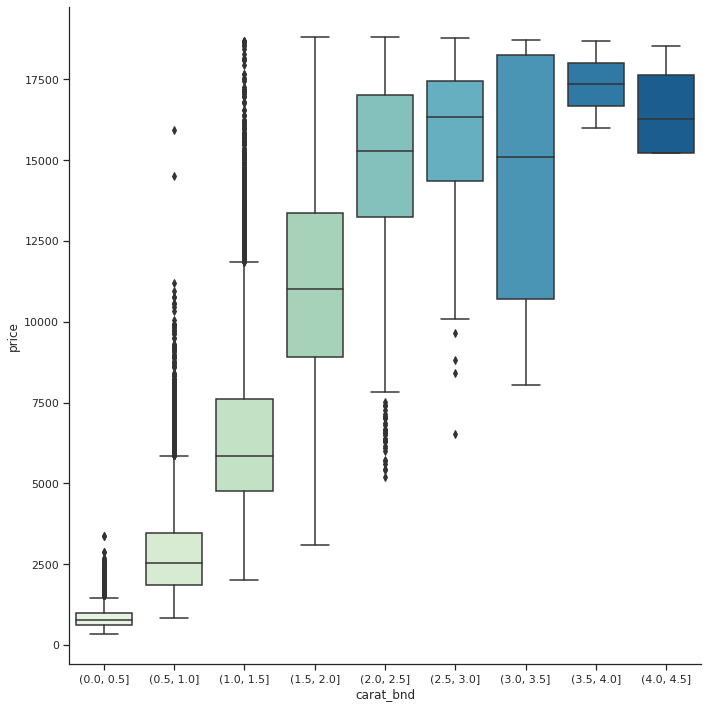

In [55]:
sns.catplot(x='carat_bnd', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

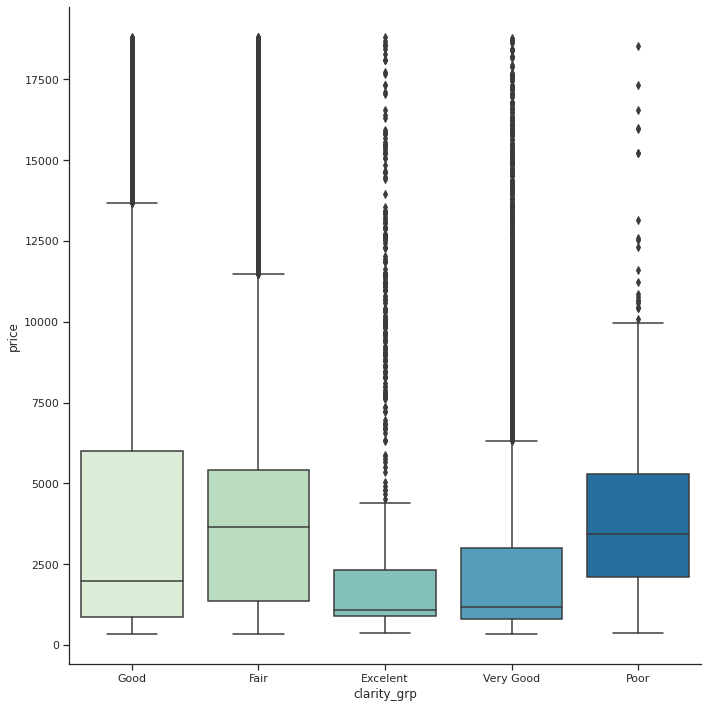

In [56]:
sns.catplot(x='clarity_grp', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

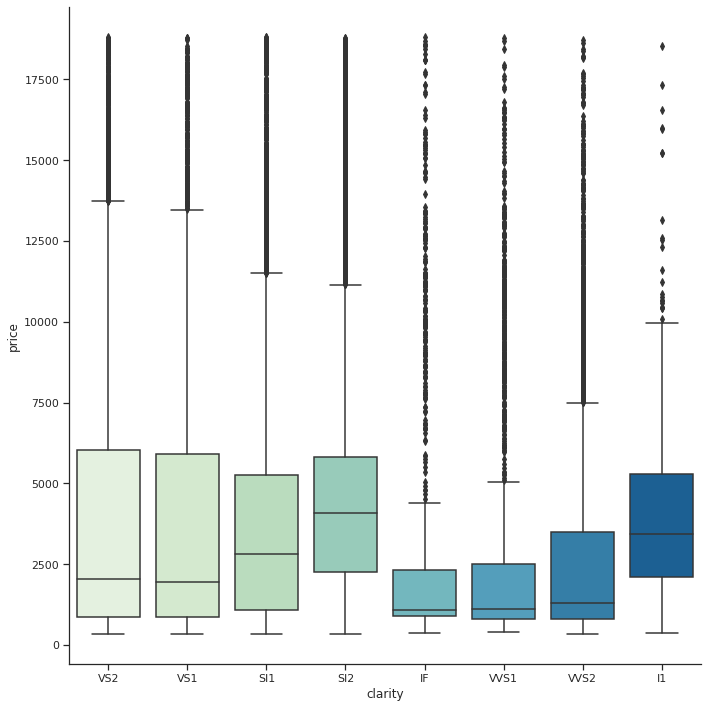

In [51]:
sns.catplot(x='clarity', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

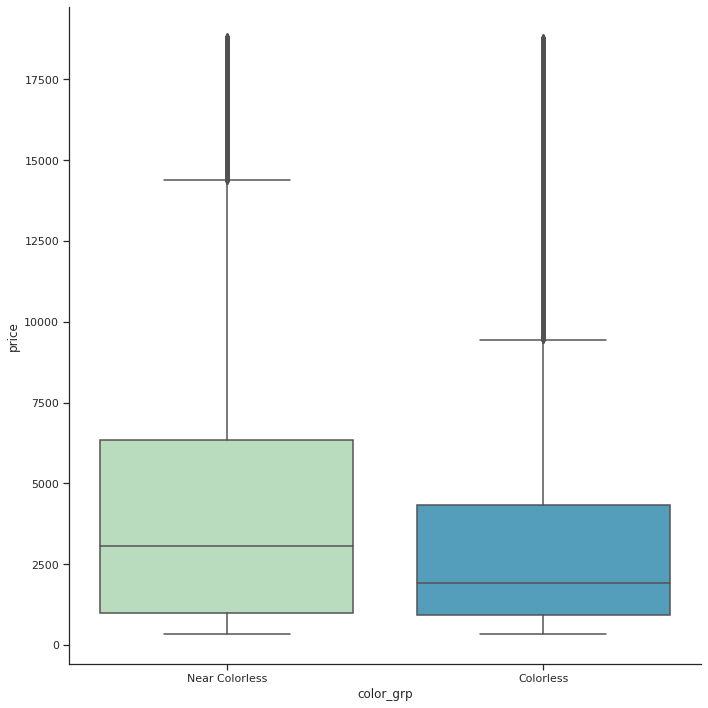

In [54]:
sns.catplot(x='color_grp', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

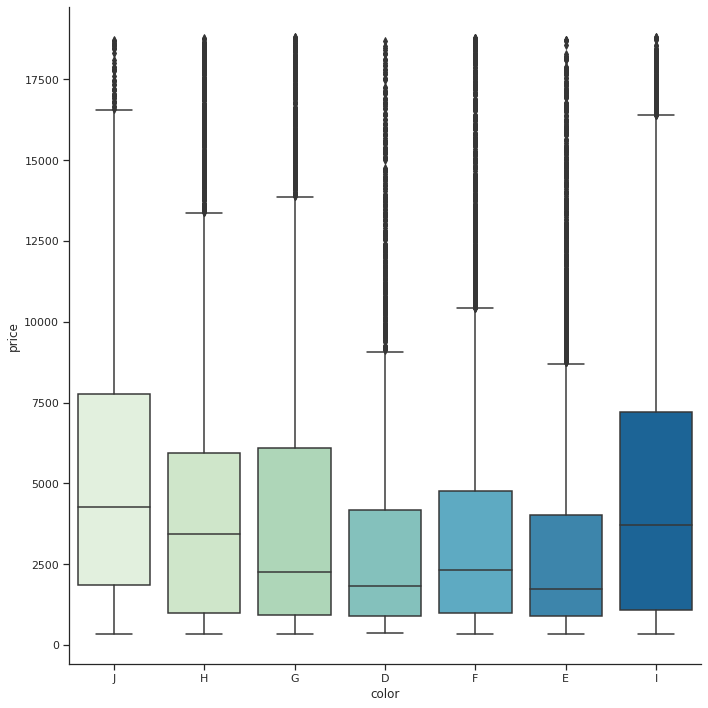

In [58]:
sns.catplot(x='color', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

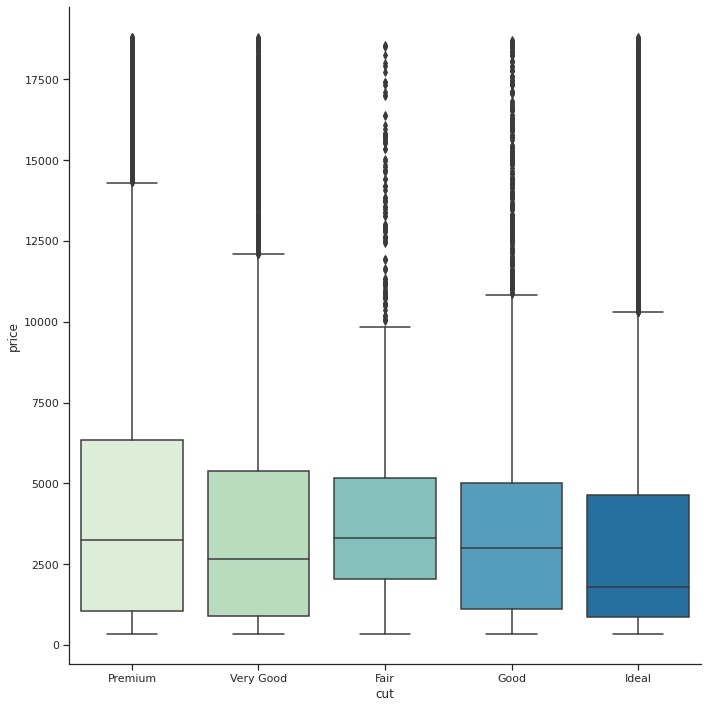

In [59]:
sns.catplot(x='cut', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

**Several aspects came after this analysis:**
- Carat is the most important thing to watch. For example, why a poor clarity diamonds is more expensive, on average, than excellent one? or why a near color less is, on average, more expensive than a colorless one? The answer is the carat!While this is not entirely wrong, it’s not entirely right, either. The size or carat weight of a diamond is only one factor in calculating the value of the diamond.

Given the amount of small-sizde diamonds, let's analyse them closely: 

In [71]:
diamonds['carat_bnd'].value_counts(normalize=True)

0.0    0.365809
1.0    0.334043
2.0    0.231745
3.0    0.068403
Name: carat_bnd, dtype: float64

In [84]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

diamonds['carat_bnd'] = pd.cut(diamonds['carat'], bins, labels=range(0,9))

**Below some tables to understand the small-carat diamonds**

In [77]:
diamonds['carat_bnd'] = diamonds['carat_bnd'].apply(lambda x:x if x < 3 else None)
diamonds_small_carat = diamonds.dropna(subset=['carat_bnd'])
diamonds_small_carat.describe()

,carat,depth,table,price,volume,carat_bnd
count,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000
mean,0.683123,61.750985,57.372160,2951.529365,111.319935,0.856093
std,0.334321,1.405160,2.219825,2649.188830,53.952859,0.787869
min,0.200000,43.000000,43.000000,326.000000,32.262375,0.000000
25%,0.380000,61.100000,56.000000,885.000000,61.582605,0.000000
50%,0.590000,61.800000,57.000000,1991.000000,96.933054,1.000000
75%,1.000000,62.500000,59.000000,4368.000000,161.183305,1.000000
max,1.500000,79.000000,79.000000,18700.000000,255.803400,2.000000


In [78]:
columns_to_show = ['price', 'carat']
diamonds_small_carat.groupby(['cut'])[columns_to_show].agg([np.count_nonzero, np.mean, np.std, np.min, np.max])

price                                               carat  \
          count_nonzero         mean          std amin   amax count_nonzero   
cut                                                                           
Fair               1015  3181.974384  1924.764603  337  16364        1015.0   
Good               3301  3009.418358  2345.686799  327  17449        3301.0   
Ideal             15065  2706.809824  2681.221115  326  18700       15065.0   
Premium            8743  3221.956651  2714.561267  326  18279        8743.0   
Very Good          8212  3060.803702  2673.182453  337  18691        8212.0   

                                          
               mean       std  amin amax  
cut                                       
Fair       0.866424  0.275431  0.22  1.5  
Good       0.738549  0.321594  0.23  1.5  
Ideal      0.618202  0.316531  0.20  1.5  
Premium    0.734959  0.352209  0.20  1.5  
Very Good  0.702098  0.333824  0.21  1.5

In [79]:
diamonds_small_carat.groupby(['clarity_grp'])[columns_to_show].agg([np.count_nonzero, np.mean,np.median, np.std, np.min, np.max])

price                                               \
            count_nonzero         mean median          std amin   amax   
clarity_grp                                                              
Excelent             1303  2589.605526   1064  3523.745051  369  18700   
Fair                14225  3074.950861   2830  2067.496080  326  13445   
Good                13986  2985.348134   1791  2796.731085  327  18691   
Poor                  406  2663.977833   2702  1300.350246  361   6096   
Very Good            6416  2695.867363   1143  3234.435339  354  18682   

                    carat                                        
            count_nonzero      mean median       std  amin amax  
clarity_grp                                                      
Excelent           1303.0  0.479493   0.35  0.270752  0.23  1.5  
Fair              14225.0  0.788995   0.79  0.317169  0.20  1.5  
Good              13986.0  0.655465   0.54  0.329764  0.20  1.5  
Poor                406.0  0.991552   1.01  0.287242  0.30  1.5  
Very Good          6416.0  0.530524   0.41  0.297679  0.23  1.5

In [82]:
diamonds_small_carat.groupby(['color_grp'])[columns_to_show].agg([np.count_nonzero, np.mean,np.median, np.std, np.min, np.max])

price                                               \
               count_nonzero         mean median          std amin   amax   
color_grp                                                                   
Colorless              18629  2826.511890   1787  2705.111917  326  18700   
Near Colorless         17707  3083.056475   2262  2582.601835  334  18691   

                       carat                                        
               count_nonzero      mean median       std  amin amax  
color_grp                                                           
Colorless            18629.0  0.633779   0.54  0.305497  0.20  1.5  
Near Colorless       17707.0  0.735037   0.71  0.354855  0.23  1.5

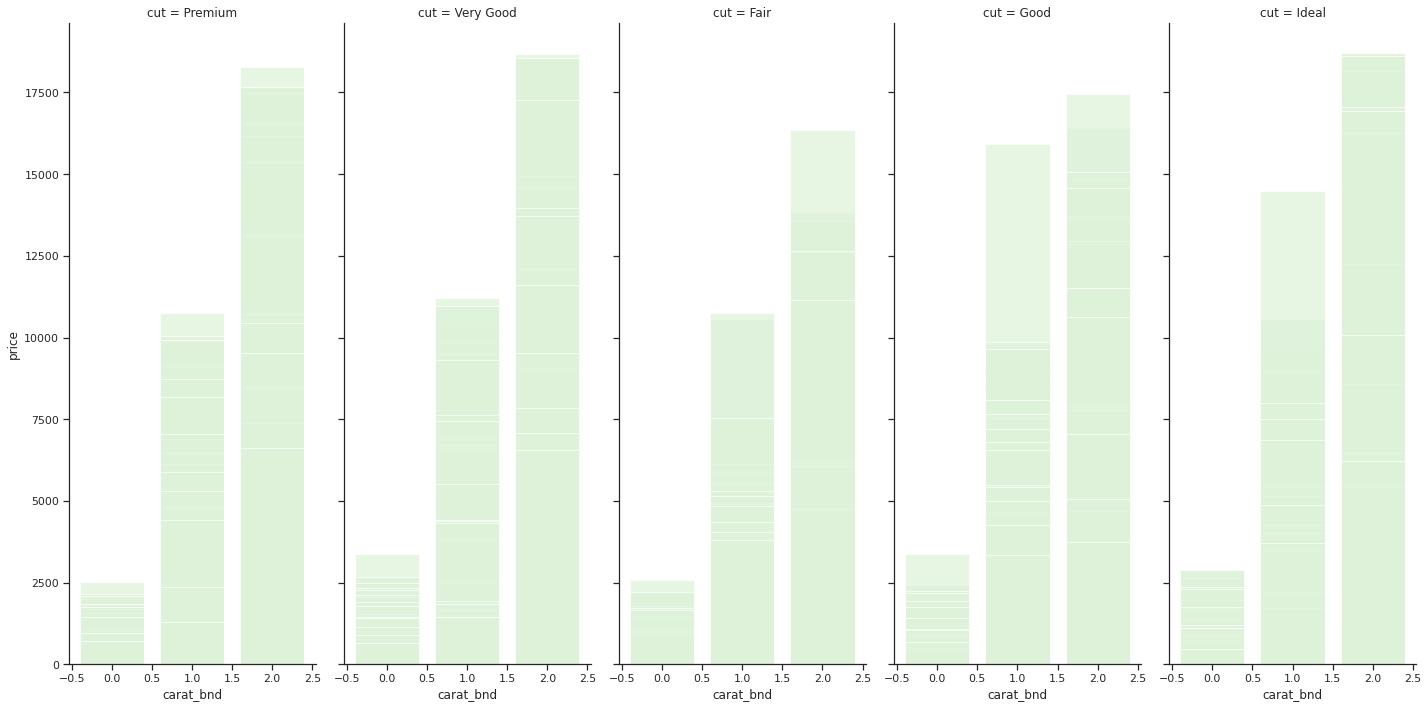

In [81]:
g = sns.FacetGrid(diamonds, col="cut", palette='Spectral', aspect=0.4, height=10)
g.map(plt.bar,  'carat_bnd',"price", alpha=.7);

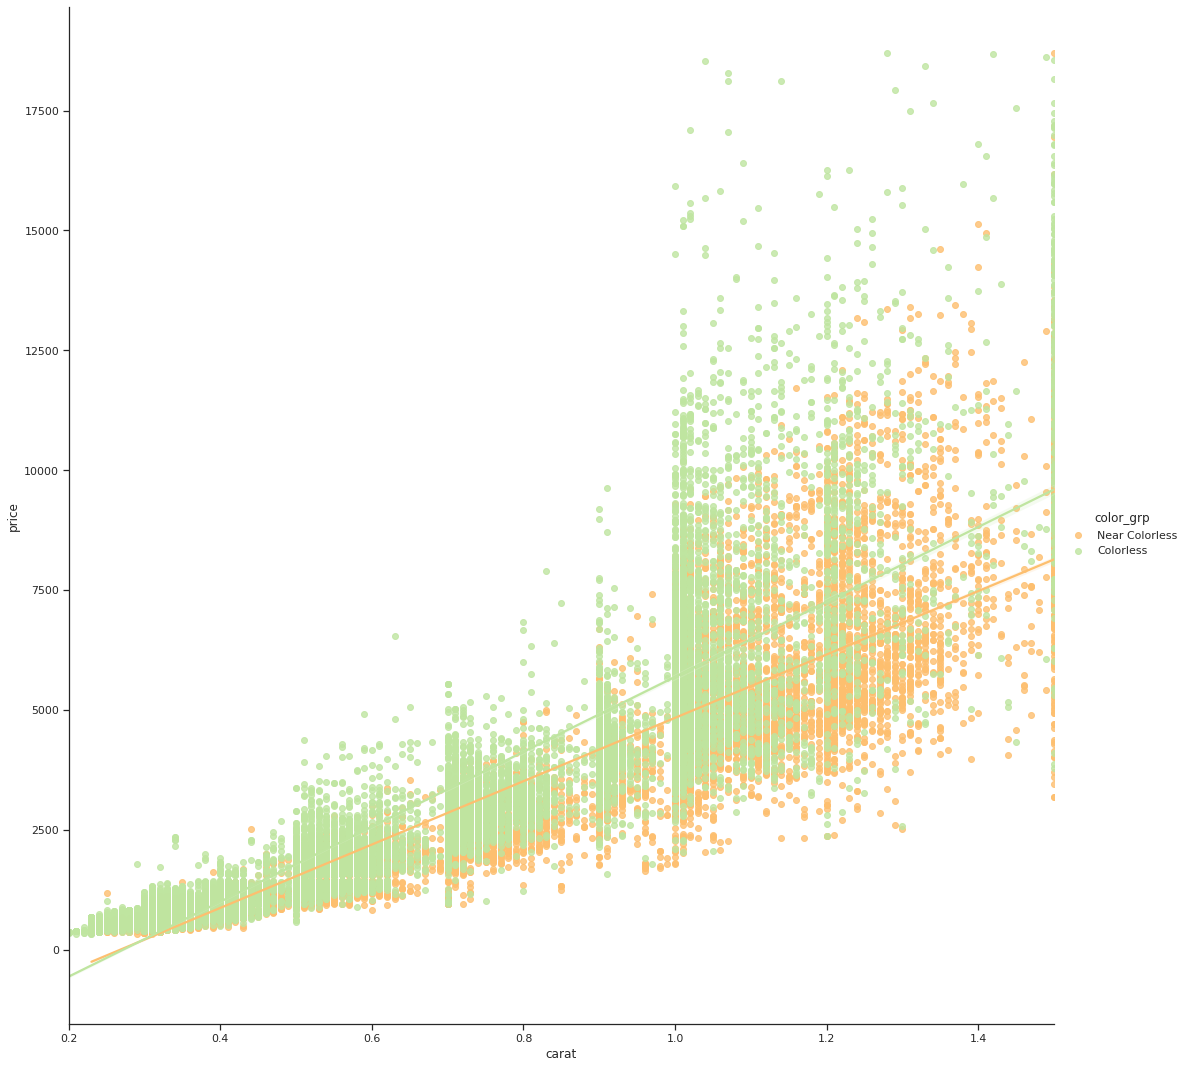

In [87]:
sns.lmplot(x='carat', y='price', data=diamonds_small_carat,#fit_reg=False, # No regression line
           hue='color_grp',
          height=15, palette='Spectral')   # Color by evolution stage

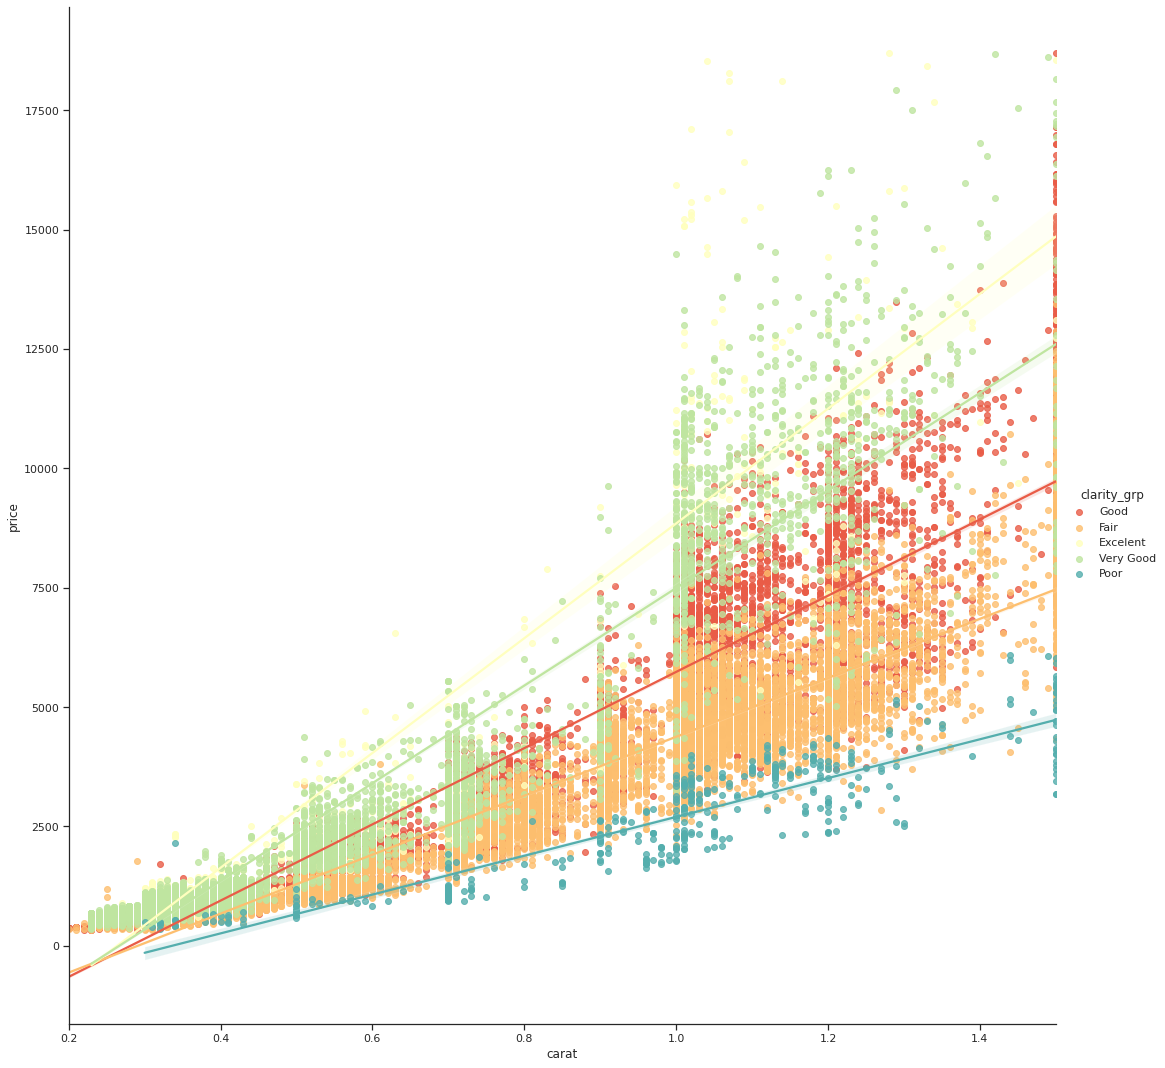

In [88]:
sns.lmplot(x='carat', y='price', data=diamonds_small_carat, hue='clarity_grp', height=15, palette='Spectral');

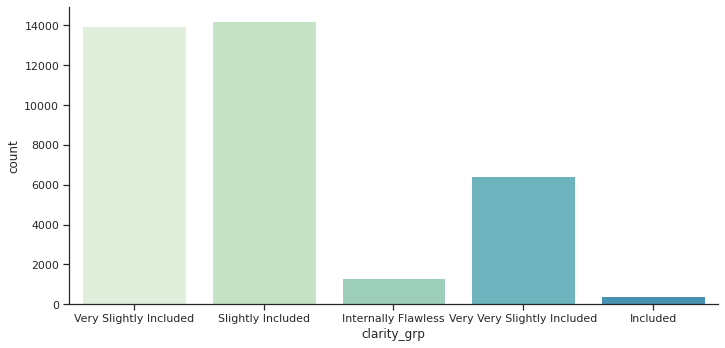

In [217]:
sns.catplot(x='clarity_grp', data=diamonds_small_carat, kind='count' ,aspect=2);

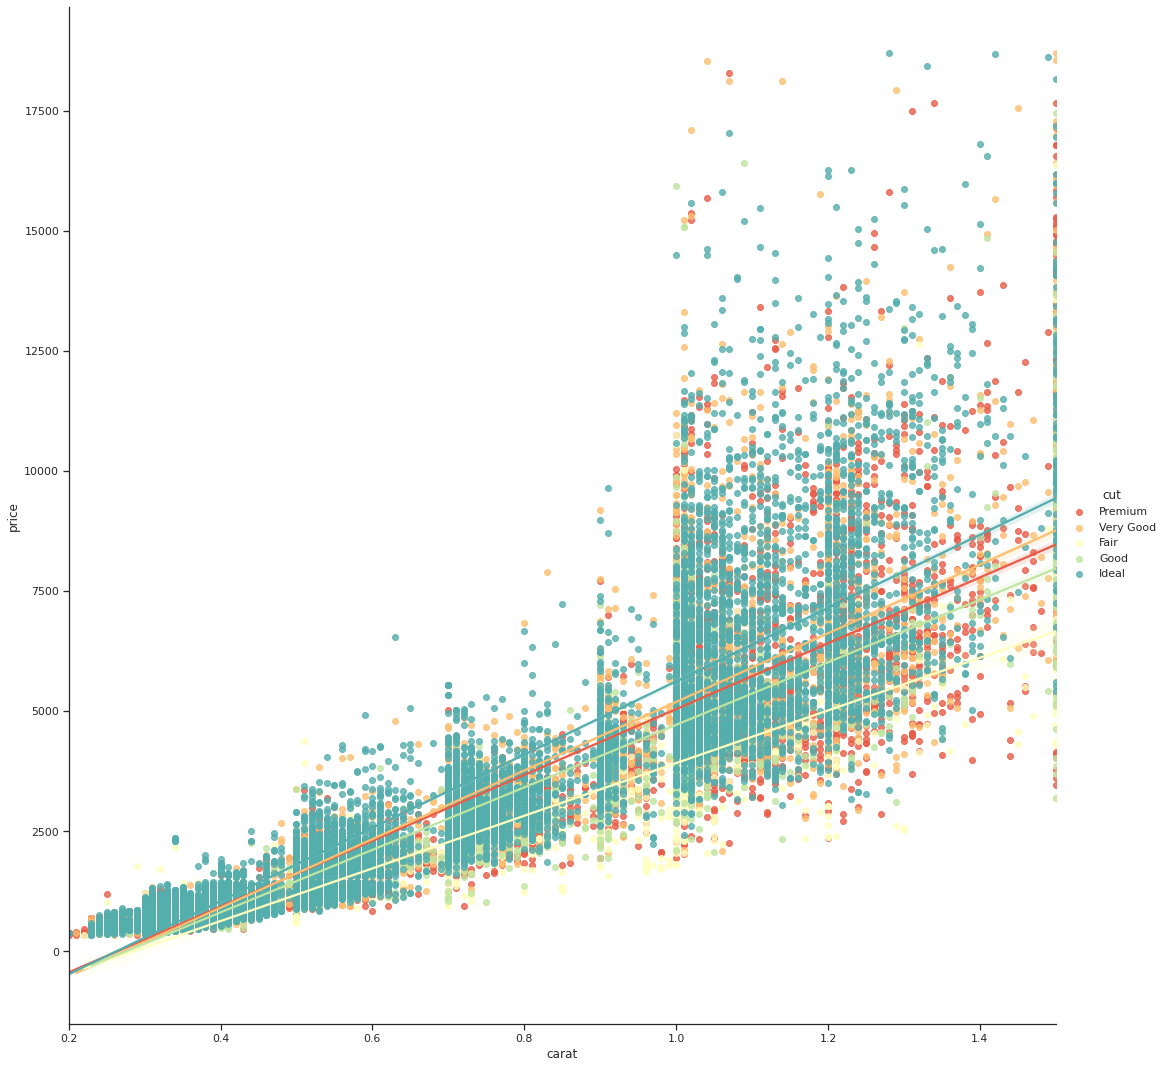

In [222]:
sns.lmplot(x='carat', y='price', data=diamonds_small_carat,
           #fit_reg=False, # No regression line
           hue='cut',
          height=15, palette='Spectral')   # Color by evolution stage

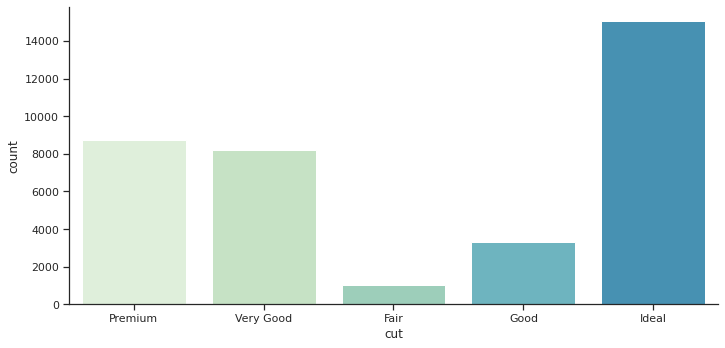

In [224]:
sns.catplot(x='cut', data=diamonds_small_carat, kind='count' ,aspect=2);

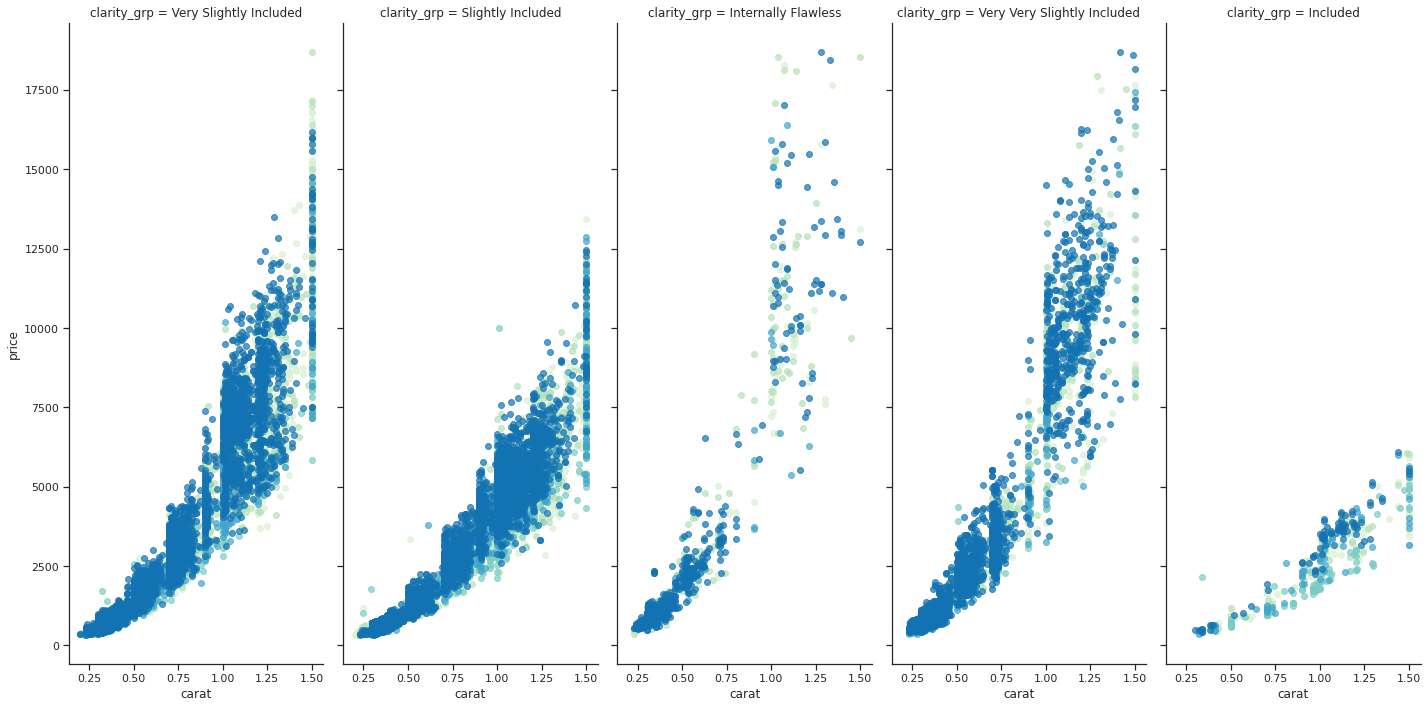

In [35]:
g = sns.FacetGrid(diamonds_small_carat, col="clarity_grp", hue='cut', palette='GnBu', aspect=0.4, height=10)
g.map(plt.scatter,  'carat',"price", alpha=.7);